In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
train=pd.read_csv('https://raw.githubusercontent.com/dfbustosus/Curso_DS_para_todos/main/Data/train_titanic.csv')
test=pd.read_csv('https://raw.githubusercontent.com/dfbustosus/Curso_DS_para_todos/main/Data/test_titanic.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Variable  | Descripcion
-------------------|------------------
Survived|	Survived (1) or died (0)
Pclass	|Passenger’s class
Name	|Passenger’s name
Sex	|Passenger’s sex
Age	|Passenger’s age
SibSp	|Number of siblings/spouses aboard (hermanos/conyuges)
Parch	|Number of parents/children aboard (parientes y niños)
Ticket	|Ticket number
Fare	|Fare
Cabin	|Cabin
Embarked	|Port of embarkation

In [3]:
train.shape, test.shape

((891, 12), (418, 11))

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Etapas**

1. Data Extraction
2. Definir objetivo/hipotesis/pregunta 
3. EDA
4. Data Wrangling/Data munging/ Data Transformation/Data Cleaning (problemas: nulos, atipicos, duplicados)
5. Data Model (elige algoritmo o varios para resolver su problema)
6. Data validation (cross validation)
7. Deploy (Despliegue) >> Devops /MLOps

**Hipotesis**

1. Las familias numerosas tenian menos probabilidad de sobrevivir
2. Ser niño o madre tiene mas preponderancia a la hora se sobrevivir


# Feature Engineering

In [5]:
full= pd.concat([train,test], axis=0) 
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
full.shape

(1309, 12)

In [7]:
full['Name'][1].values[0]

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

**regex (regular expressions)**

In [7]:
# Exploraremos la columna passenger name y nos interesa la abreviatura de cada uno
import re
# (.*, ): cualquier cantidad de caracteres anttes de la coma
# (\\..*): cualquier elemento que este adelante de la coma luego del punto
full['Title']=full['Name'].apply(lambda x : re.sub("(.*, )|(\\..*)", "", x)) 
# En esta pagina puedne encontrar como probarlo:https://extendsclass.com/regex-tester.html#python
# Documentacion de re: https://docs.python.org/3/library/re.html
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [8]:
pd.crosstab(full.Sex, full.Title)

Title,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [9]:
#reemplazo las categorias raras por las tipicas
rare_title= ['Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
full.loc[full.Title == 'Mlle','Title'] ='Miss'
full.loc[full.Title == 'Ms','Title'] ='Miss'
full.loc[full.Title == 'Mme','Title'] ='Mrs'
full.loc[full.Title.isin(rare_title),'Title'] ='Rare Title'
pd.crosstab(full.Sex, full.Title)

Title,Master,Miss,Mr,Mrs,Rare Title
Sex,,,,,
female,0,264,0,198,4
male,61,0,757,0,25


In [11]:
a=full['Name'][0].values[0]
print(a) # el metodo index encuenta en que posicion del carcater se encuentra cierto caracter
a[0:a.index(',')] # luego indexo a todos los caracteres antes de la ,

Braund, Mr. Owen Harris


'Braund'

In [21]:
# Extrayendo el apellido
full['Surname']=full['Name'].apply(lambda x : x[0:x.index(',')])
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen


## Las familias se hundieron o nadaron juntos

Primero vamos a hacer una variable del tamaño de la familia basada en el número de hermanos/cónyuge(s) (¿quizás alguien tiene más de un cónyuge?) y el número de hijos/padres.

In [24]:
full['Fsize']=full['SibSp']+full['Parch']+1 # el 1 es porque hay que incluirlo a el
full['Fsize']=full['Fsize'].astype('str') # la convierto a string
full['Family']=full[['Surname', 'Fsize']].agg('_'.join, axis=1) # luego colo apellido_total
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,Braund_2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings_2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,Heikkinen_1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle_2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,Allen_1


In [25]:
full.Fsize.value_counts()

Fsize
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: count, dtype: int64

In [26]:
full.Survived.unique() # claro porque test no tenia la columna Survived quedaron nulos

array([ 0.,  1., nan])

In [29]:
# Voy a crear un dataframe con los conteos
tr=pd.DataFrame(full.Fsize.value_counts())
tr=tr.reset_index()
tr.columns=['F','Fsize']
tr

,F,Fsize
0,1,790
1,2,235
2,3,159
3,4,43
4,6,25
5,5,22
6,7,16
7,11,11
8,8,8


In [30]:
tr.dtypes

F        object
Fsize     int64
dtype: object

In [35]:
tr=full[['Fsize','Survived','Sex']].groupby(['Fsize','Survived']).count().reset_index()
tr.columns=['Fsize','Survived','F']
tr['Fsize']=tr['Fsize'].astype('int')
tr.sort_values(by='Fsize')

,Fsize,Survived,F
0,1,0.0,374
1,1,1.0,163
3,2,0.0,72
4,2,1.0,89
5,3,0.0,43
6,3,1.0,59
7,4,0.0,8
8,4,1.0,21
9,5,0.0,12
10,5,1.0,3


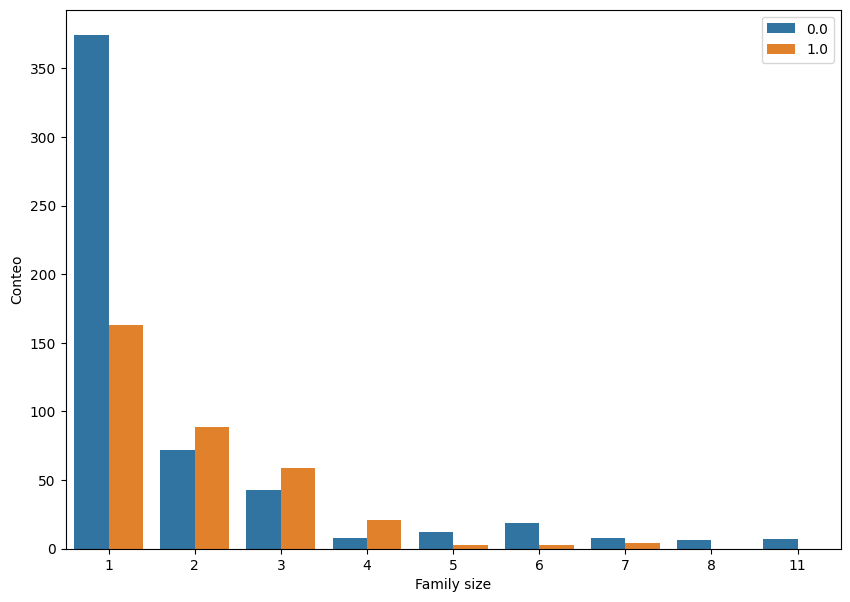

In [36]:
# algunos graficos descriptivos
plt.figure(figsize=(10,7))
sns.barplot(y="F", x="Fsize", data=tr,hue='Survived', orient='v')
plt.xlabel('Family size')
plt.ylabel('Conteo')
plt.legend(loc='upper right')

Podemos ver que hay una penalización de supervivencia para los hijos únicos y aquellos con familias de más de 4 (**te mueres si estas solo o si tienes una familia numerosa**). 

Podemos colapsar esta variable en tres niveles que serán útiles ya que hay comparativamente menos familias numerosas. Vamos a crear una variable de tamaño de familia discretizada.

In [20]:
full['Fsize'].unique()

array(['2', '1', '5', '3', '7', '6', '4', '8', '11'], dtype=object)

La logica de lo que voy a hacer es:
```python
if Fsize==1:
  FsizeD= 'singleton'
elif Fsize <5 & Fsize >1:
  FsizeD= 'small
else:
  FsizeD= 'large'
```
Ahora lo traslado a un ```np.where()```

In [43]:
# Discretizar la variable family size
full['Fsize']=full['Fsize'].astype('int')
full['FsizeD']=np.where(full.Fsize ==1, 'singleton',
                        np.where(((full.Fsize <5) & (full.Fsize >1)),'small',
                                 'large')
                        )
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family,FsizeD
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,Braund_2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings_2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,Heikkinen_1,singleton
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle_2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,Allen_1,singleton


In [44]:
ts=pd.crosstab(full.FsizeD, full.Survived)
ts.columns=['No','Si']
ts=ts.reset_index()
ts

,FsizeD,No,Si
0,large,52,10
1,singleton,374,163
2,small,123,169


In [45]:
ts1=pd.melt(ts,id_vars=['FsizeD'],value_vars=['No','Si'])
ts1

,FsizeD,variable,value
0,large,No,52
1,singleton,No,374
2,small,No,123
3,large,Si,10
4,singleton,Si,163
5,small,Si,169


In [46]:
G = ts1.groupby(["FsizeD", "variable"]).sum()
G

value
FsizeD    variable       
large     No           52
          Si           10
singleton No          374
          Si          163
small     No          123
          Si          169

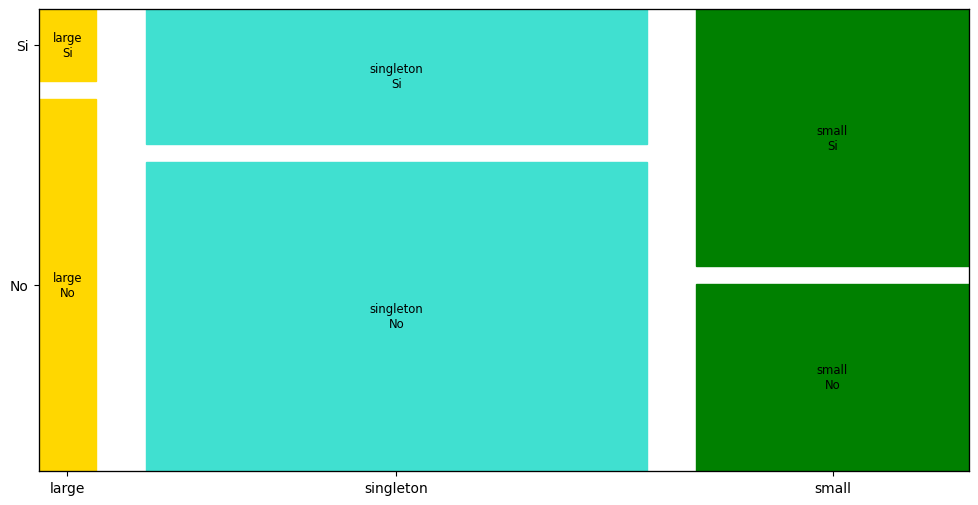

In [47]:
# Vamos a crear el mosaic plot
from statsmodels.graphics.mosaicplot import mosaic
fig, ax = plt.subplots(figsize=(12, 6))
props = lambda key: {'color': 'turquoise' if 'singleton'in key else ('green' if 'small' in key else 'gold')}
mosaic(G["value"],gap=0.06,ax=ax, properties=props)
plt.show()

La trama de mosaico muestra que preservamos nuestra regla de que hay una penalización de supervivencia entre los solteros y las familias numerosas, pero un beneficio para los pasajeros de familias pequeñas. Podemos hacer algo más con nuestra variable de edad, pero faltan valores de edad en 263 filas

## Tratar algunas otras variables

In [48]:
# Esta variable tiene muchos nulos
full.Cabin[1:28]

1             C85
2             NaN
3            C123
4             NaN
5             NaN
6             E46
7             NaN
8             NaN
9             NaN
10             G6
11           C103
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            D56
22            NaN
23             A6
24            NaN
25            NaN
26            NaN
27    C23 C25 C27
Name: Cabin, dtype: object

Extraigamos las primeras letras de la columna Cabin que representa el Deck

In [49]:
full['Deck']=full['Cabin'].astype(str).str[0] #sacar primera letra
full['Deck']=full.Deck.str.upper() #convertir a mayuscula
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family,FsizeD,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,Braund_2,small,N
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings_2,small,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,Heikkinen_1,singleton,N
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle_2,small,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,Allen_1,singleton,N


In [50]:
full.Deck.value_counts()

Deck
N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [51]:
full.shape

(1309, 18)

In [52]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family,FsizeD,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,Braund_2,small,N
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings_2,small,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,Heikkinen_1,singleton,N
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle_2,small,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,Allen_1,singleton,N


In [54]:
full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
Surname           0
Fsize             0
Family            0
FsizeD            0
Deck              0
dtype: int64

# Problema de nulos

Ahora estamos listos para comenzar a explorar los datos faltantes y rectificarlos a través de la imputación. Hay varias maneras diferentes en las que podríamos hacer esto. 

Dado el **pequeño tamaño del conjunto de datos**, probablemente no deberíamos optar por eliminar observaciones completas (filas) o variables (columnas) que contengan valores faltantes. 

Nos queda la opción de **reemplazar los valores faltantes con valores dada la distribución de los datos**, por ejemplo, la **media, la mediana o la moda**. Finalmente, podríamos ir con la predicción. 

Usaremos los dos últimos métodos **(mediana, moda)** y confiaré en alguna visualización de datos para guiar nuestras decisiones.

## Imputacion sensible

In [55]:
full.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
Surname         object
Fsize            int32
Family          object
FsizeD          object
Deck            object
dtype: object

In [56]:
full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
Surname           0
Fsize             0
Family            0
FsizeD            0
Deck              0
dtype: int64

In [57]:
full.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [58]:
full.Embarked.isnull().sum()

2

In [61]:
np.where(full['Embarked'].isnull())[0]

array([ 61, 829], dtype=int64)

In [35]:
np.where(full['Embarked'].isnull())[0] # indices donde estan los nulos

array([ 61, 829], dtype=int64)

In [62]:
 # Pasajeros 62 y 830 no tienen datos, verificado!
full[(full.PassengerId == 62) | (full.PassengerId == 830)]['Embarked']

61     NaN
829    NaN
Name: Embarked, dtype: object

In [63]:
# eliminar los ids de pasajeros  Borrar estas dos filas para mirar distribucion!
embark_fare = full[(full.PassengerId !=62)|(full.PassengerId !=830)]
embark_fare.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family,FsizeD,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,Braund_2,small,N
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings_2,small,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,Heikkinen_1,singleton,N
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle_2,small,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,Allen_1,singleton,N


In [64]:
full[(full.PassengerId == 62) | (full.PassengerId == 830)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family,FsizeD,Deck
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,Icard,1,Icard_1,singleton,B
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,Stone,1,Stone_1,singleton,B


Inferiremos sus valores para el embarque en base a los datos actuales que imaginamos pueden ser relevantes: clase de pasajero (NAN) y tarifa (80). Además vienen de Pclass=1 Entonces, ¿de dónde se embarcaron?

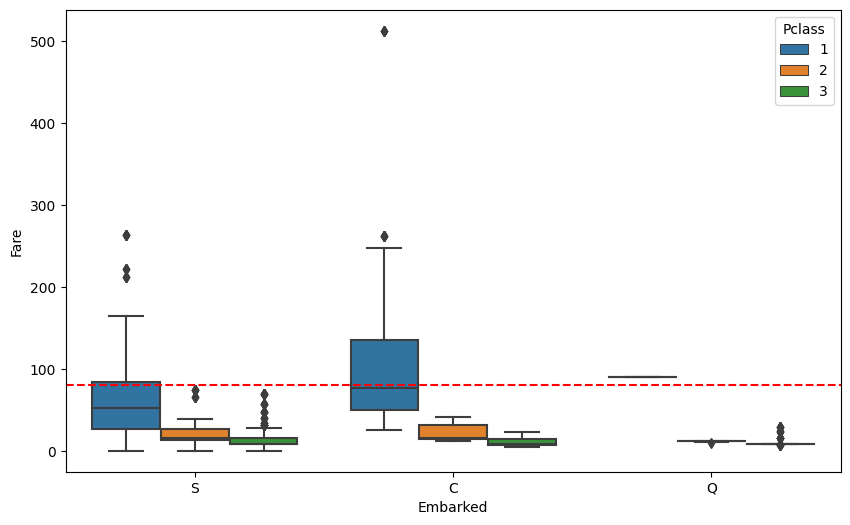

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Embarked',y= 'Fare',hue='Pclass',data= embark_fare)
plt.axhline(y = 80, color = 'r', linestyle = '--')

¡Voila! La tarifa mediana para un pasajero de primera clase que sale de Charbourg ("C") coincide muy bien con los $80 que pagan nuestros pasajeros con problemas de embarque. Creo que podemos reemplazar con seguridad los valores NA con 'C'.

In [67]:
# Dado que su tarifa era de $ 80 por primera clase, lo más probable es que se embarcaran desde 'C' 
full.loc[full.PassengerId == 62, 'Embarked']= 'C'
full.loc[full.PassengerId == 830, 'Embarked']= 'C'
full.Embarked.value_counts() # Verificamos 

Embarked
S    914
C    272
Q    123
Name: count, dtype: int64

Estamos cerca de arreglar el puñado de valores de NA aquí y allá. El pasajero de la fila 1043 tiene un valor de tarifa NA.

In [68]:
full.isnull().sum() # mirar nulos restantes, sigamos con Fare

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
Title             0
Surname           0
Fsize             0
Family            0
FsizeD            0
Deck              0
dtype: int64

In [69]:
np.where(full['Fare'].isnull())[0] #encontrado

array([1043], dtype=int64)

In [70]:
full.iloc[1043,:]

PassengerId                  1044
Survived                      NaN
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Cabin                         NaN
Embarked                        S
Title                          Mr
Surname                    Storey
Fsize                           1
Family                   Storey_1
FsizeD                  singleton
Deck                            N
Name: 152, dtype: object

Este es un pasajero de tercera clase que partió de Southampton ('S'). Visualicemos las tarifas entre todos los demás compartiendo su clase y embarque (n = 494).

In [71]:
full[(full.Pclass ==3)& (full.Embarked == 'S')]['Fare'].median()

8.05

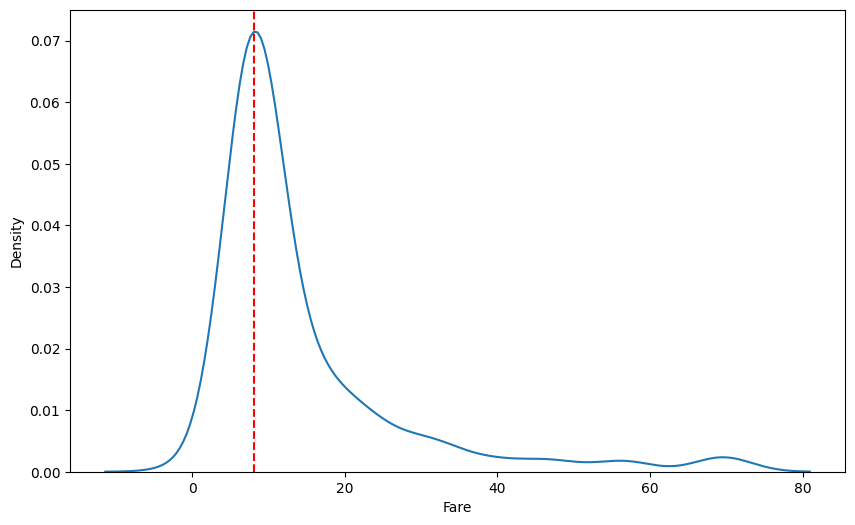

In [72]:
plt.figure(figsize=(10,6))
sns.distplot(full[(full.Pclass ==3)& (full.Embarked == 'S')]['Fare'],kde=True,hist=False)
plt.axvline(x = full[(full.Pclass ==3)& (full.Embarked == 'S')]['Fare'].median(), color = 'r', linestyle = '--')

A partir de esta visualización, parece bastante razonable reemplazar el valor de la tarifa NA con una mediana para su clase y embarque, que es de $8,05.

In [73]:
# Reemplazamos
full.loc[full.PassengerId == 1044, 'Fare']= full[(full.Pclass ==3)& (full.Embarked == 'S')]['Fare'].median()
full.iloc[1043,:] # todo ok!!

PassengerId                  1044
Survived                      NaN
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                         8.05
Cabin                         NaN
Embarked                        S
Title                          Mr
Surname                    Storey
Fsize                           1
Family                   Storey_1
FsizeD                  singleton
Deck                            N
Name: 152, dtype: object

Sigamos con Age y Survived!!

In [74]:
full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
Surname           0
Fsize             0
Family            0
FsizeD            0
Deck              0
dtype: int64

## Imputacion predictiva

Finalmente, como señalamos anteriormente, faltan bastantes valores de Edad en nuestros datos. Vamos a ser un poco más sofisticados en la imputación de valores de edad faltantes. ¿Por qué? Porque podemos. Crearemos un modelo que prediga las edades en función de otras variables.

In [75]:
full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
Surname           0
Fsize             0
Family            0
FsizeD            0
Deck              0
dtype: int64

In [76]:
sum(full.Age.isna())

263

In [50]:
!pip install -q fancyimpute

Una estrategia para imputar valores perdidos mediante el modelado de cada característica con valores perdidos como una función de otras características de forma rotativa.

Metodo regresionRidge por defecto y el RoundRobin lo que hace es esto:

```python
X = df[['B','C','D']]
y = df[['A']]

X = df[['A','C','D']]
y = df[['B']]   

X = df[['A','B','D']]
y = df[['C']]    

```

In [77]:
from fancyimpute import IterativeImputer
mice_impute = IterativeImputer()
# doc:https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
traindatafill = mice_impute.fit_transform(full[['Age','SibSp','Fare','Survived']])
traindatafill= pd.DataFrame(traindatafill)

In [78]:
traindatafill

,0,1,2,3
0,22.000000,1.0,7.2500,0.000000
1,38.000000,1.0,71.2833,1.000000
2,26.000000,0.0,7.9250,1.000000
3,35.000000,1.0,53.1000,1.000000
4,35.000000,0.0,8.0500,0.000000
...,...,...,...,...
1304,30.517684,0.0,8.0500,0.336586
1305,39.000000,0.0,108.9000,0.573728
1306,38.500000,0.0,7.2500,0.289297
1307,30.517684,0.0,8.0500,0.336586


In [79]:
traindatafill.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

Text(0.5, 1.0, 'Modificacion MICE Age')

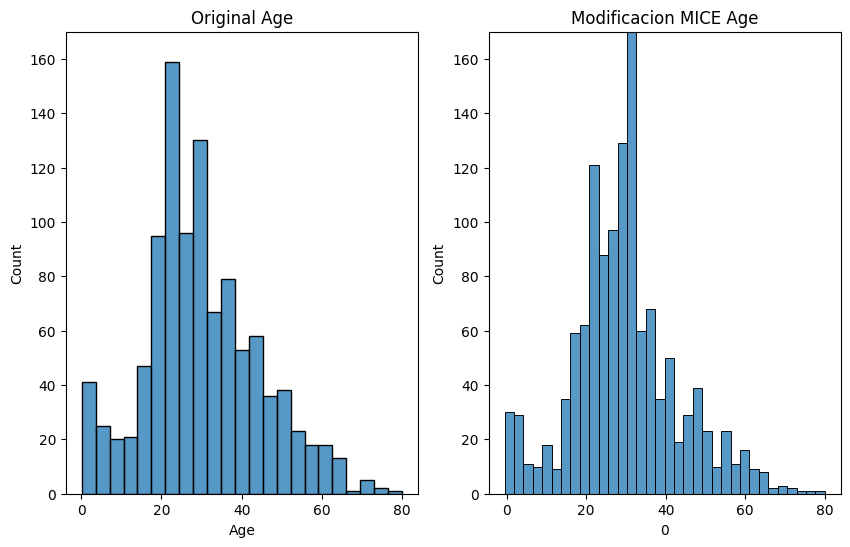

In [80]:
# Verificar si cambiamos distribucion
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.histplot(full.Age)
plt.ylim([0,170])
plt.title('Original Age')
plt.subplot(122)
sns.histplot(traindatafill[0])
plt.ylim([0,170])
plt.title('Modificacion MICE Age')
# No todo ok

**Multivariate Imputation by Chained Equations**

In [81]:
# Reasignacion
full['Age']= traindatafill[0] 
full['Survived']= traindatafill[3] 
print(full.Age.isnull().sum())
print(full.Survived.isnull().sum())

0
0


In [82]:
full.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
Surname           0
Fsize             0
Family            0
FsizeD            0
Deck              0
dtype: int64

# Voy por aqui!

## Feature Engineering Parte II

Ahora que sabemos la edad de todos, podemos crear un par de nuevas variables dependientes de la edad: 'Child' y 'Mother'. 

- Un niño será simplemente alguien menor de 18 años 
- Una madre es un pasajero que es 1) mujer, 2) tiene más de 18 años, 3) tiene más de 0 hijos (¡no es broma!), y 4) no tiene el título 'Miss'.

In [58]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family,FsizeD,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,Braund_2,small,N
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings_2,small,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,Heikkinen_1,singleton,N
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle_2,small,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,Allen_1,singleton,N


In [59]:
full['Survived']=full['Survived'].astype('str')
full.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
Surname         object
Fsize            int32
Family          object
FsizeD          object
Deck            object
dtype: object

In [60]:
df_male= full.loc[full.Sex == 'male']
df_male.reset_index()
df_female= full.loc[full.Sex == 'female']
df_female.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family,FsizeD,Deck
0,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings_2,small,C
1,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,Heikkinen_1,singleton,N
2,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle_2,small,C
3,8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,Mrs,Johnson,3,Johnson_3,small,N
4,9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,Mrs,Nasser,2,Nasser_2,small,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,409,1301,0.0,3,"Peacock, Miss. Treasteall",female,20.235103,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,Miss,Peacock,3,Peacock_3,small,N
462,410,1302,0.0,3,"Naughton, Miss. Hannah",female,32.368066,0,0,365237,7.7500,NaN,Q,Miss,Naughton,1,Naughton_1,singleton,N
463,411,1303,0.0,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,32.295987,1,0,19928,90.0000,C78,Q,Mrs,Minahan,2,Minahan_2,small,C
464,412,1304,1.0,3,"Henriksson, Miss. Jenny Lovisa",female,33.000000,0,0,347086,7.7750,NaN,S,Miss,Henriksson,1,Henriksson_1,singleton,N


(0.0, 100.0)

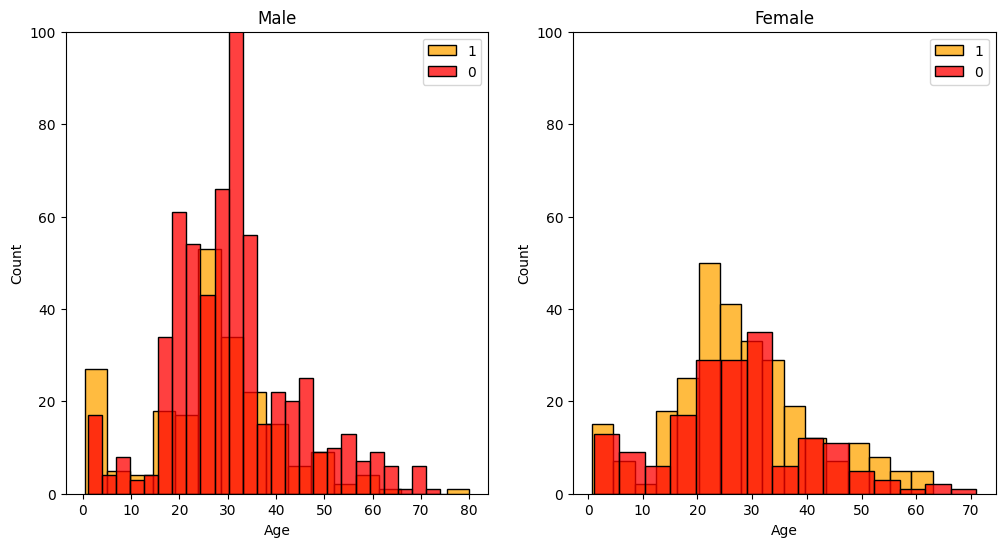

In [61]:
# Ahora miremos la relacion edad vs survival
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.histplot(df_male.loc[df_male['Survived']=='1.0']['Age'], color='orange',label='1')
sns.histplot(df_male.loc[df_male['Survived']=='0.0']['Age'],color='red',label='0')
plt.legend()
plt.title('Male')
plt.ylim([0,100])
plt.subplot(122)
sns.histplot(df_female.loc[df_female['Survived']=='1.0']['Age'], color='orange',label='1')
sns.histplot(df_female.loc[df_female['Survived']=='0.0']['Age'],color='red',label='0')
plt.legend()
plt.title('Female')
plt.ylim([0,100])

In [62]:
# Crear la columna child
full['Child']= np.where(full['Age']<18, 'Child','Adult')
# mostrar conteos
pd.crosstab(full.Child, full.Survived)

Survived,0.0,1.0
Child,,
Adult,714,415
Child,90,90


Parece que ser un niño no es tan malo, ¡pero tampoco necesariamente te salvará! Terminaremos nuestra ingeniería de características creando la variable Madre. Tal vez podamos esperar que las madres tengan más probabilidades de haber sobrevivido en el Titanic.

In [63]:
# Creando la variable Mother
full['Mother'] = 'Not Mother'
full.loc[(full.Sex == 'female') & (full.Parch >0) & (full.Age >18) & (full.Title != 'Miss'), 'Mother']= 'Mother'
full.Mother.value_counts()

Mother
Not Mother    1231
Mother          78
Name: count, dtype: int64

In [64]:
full.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Surname',
       'Fsize', 'Family', 'FsizeD', 'Deck', 'Child', 'Mother'],
      dtype='object')

In [65]:
pd.crosstab(full.Mother, full.Survived)

Survived,0.0,1.0
Mother,,
Mother,33,45
Not Mother,771,460


In [66]:
full.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
Surname           0
Fsize             0
Family            0
FsizeD            0
Deck              0
Child             0
Mother            0
dtype: int64

Para la variable Cabin si no puedo hacer nada porque esta con muchos nulos

In [67]:
full= full.drop(columns='Cabin')
full.dropna()
full.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Surname        0
Fsize          0
Family         0
FsizeD         0
Deck           0
Child          0
Mother         0
dtype: int64

# Prediccion

## Random Forest

In [68]:
import numpy as np
from sklearn.model_selection import train_test_split
X=full[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title','FsizeD','Child','Mother']]
y= full['Survived'].astype('str')

In [69]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FsizeD,Child,Mother
0,3,male,22.000000,1,0,7.2500,S,Mr,small,Adult,Not Mother
1,1,female,38.000000,1,0,71.2833,C,Mrs,small,Adult,Not Mother
2,3,female,26.000000,0,0,7.9250,S,Miss,singleton,Adult,Not Mother
3,1,female,35.000000,1,0,53.1000,S,Mrs,small,Adult,Not Mother
4,3,male,35.000000,0,0,8.0500,S,Mr,singleton,Adult,Not Mother
...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,31.819517,0,0,8.0500,S,Mr,singleton,Adult,Not Mother
414,1,female,44.000000,0,0,108.9000,C,Rare Title,singleton,Adult,Not Mother
415,3,male,32.378779,0,0,7.2500,S,Mr,singleton,Adult,Not Mother
416,3,male,34.000000,0,0,8.0500,S,Mr,singleton,Adult,Not Mother


In [70]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
413    0.0
414    1.0
415    0.0
416    1.0
417    1.0
Name: Survived, Length: 1309, dtype: object

In [71]:
A=X[['Pclass','Age','SibSp','Parch','Fare']] # Numericas
#A= (A-A.mean())/A.std()
B=pd.get_dummies(X[['Sex','Embarked','Title','FsizeD','Child','Mother']],drop_first=True) # Binarias
X_new=pd.concat([A,B],axis=1)
X_new.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare Title,FsizeD_singleton,FsizeD_small,Child_Child,Mother_Not Mother
0,3,22.0,1,0,7.2500,True,False,True,False,True,False,False,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False,True,False,False,True,False,True
2,3,26.0,0,0,7.9250,False,False,True,True,False,False,False,True,False,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False,True,False,False,True,False,True
4,3,35.0,0,0,8.0500,True,False,True,False,True,False,False,True,False,False,True


In [72]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
413    0.0
414    1.0
415    0.0
416    1.0
417    1.0
Name: Survived, Length: 1309, dtype: object

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.30, random_state=42)

In [74]:
X_train.shape, X_test.shape

((916, 16), (393, 16))

In [75]:
from sklearn.ensemble import RandomForestClassifier
#RandomForestClassifier?

In [76]:
clf = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=30,criterion='gini')
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=30, random_state=42)

In [77]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare Title,FsizeD_singleton,FsizeD_small,Child_Child,Mother_Not Mother
257,3,30.000000,0,0,8.0500,True,False,True,False,True,False,False,True,False,False,True
158,1,32.421331,0,0,26.5500,True,False,True,False,True,False,False,True,False,False,True
91,3,20.000000,0,0,7.7750,True,False,True,False,True,False,False,True,False,False,True
808,2,39.000000,0,0,13.0000,True,False,True,False,True,False,False,True,False,False,True
304,3,32.378779,0,0,7.7500,False,True,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,1,36.000000,0,0,135.6333,False,False,False,True,False,False,False,True,False,False,True
28,1,26.837158,0,0,30.5000,True,False,True,False,True,False,False,True,False,False,True
532,3,17.000000,1,1,7.2292,True,False,False,False,True,False,False,False,True,True,True
268,3,58.000000,0,0,8.0500,False,False,True,True,False,False,False,True,False,False,True


In [78]:
# Obtener predicciones
y_pred= clf.predict(X_test)

In [79]:
y_test

257    1.0
158    0.0
91     0.0
808    0.0
304    0.0
      ... 
325    1.0
28     1.0
532    0.0
268    1.0
513    1.0
Name: Survived, Length: 393, dtype: object

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81       238
         1.0       0.75      0.54      0.63       155

    accuracy                           0.75       393
   macro avg       0.75      0.71      0.72       393
weighted avg       0.75      0.75      0.74       393



In [81]:
clf.feature_importances_

array([0.10265742, 0.20276677, 0.0339028 , 0.03618719, 0.14379319,
       0.12311059, 0.01722419, 0.02805369, 0.03145509, 0.13917661,
       0.06956802, 0.00777511, 0.01371145, 0.02536147, 0.02078638,
       0.00447001])

In [82]:
len(clf.feature_importances_)

16

In [83]:
len(X_train.columns)

16

<BarContainer object of 16 artists>

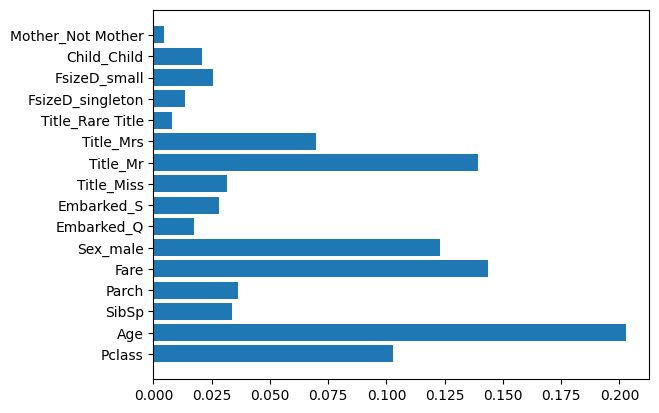

In [84]:
plt.barh(X_train.columns, clf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

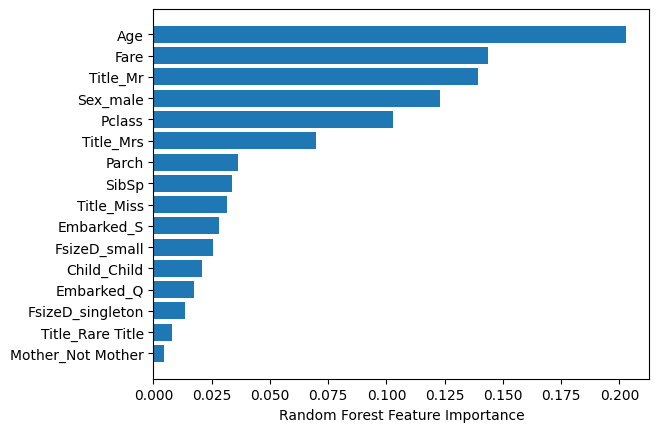

In [85]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## SVC

In [86]:
from sklearn import svm
#svm.SVC?

In [87]:
# crear el clasificador
clf = svm.SVC(kernel='linear') # Linear Kernel
#Entrenar el modelo
clf.fit(X_train, y_train)
#Obtener predicciones
y_pred = clf.predict(X_test)

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       238
         1.0       0.67      0.61      0.64       155

    accuracy                           0.73       393
   macro avg       0.71      0.70      0.71       393
weighted avg       0.72      0.73      0.72       393



## KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [90]:
y_test=neigh.predict(X_test)

In [91]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

         0.0       0.80      0.71      0.75       283
         1.0       0.42      0.54      0.47       110

    accuracy                           0.66       393
   macro avg       0.61      0.62      0.61       393
weighted avg       0.69      0.66      0.67       393



## Regresion Logistica

In [92]:
from sklearn.linear_model import LogisticRegression
#LogisticRegression?

In [93]:
clf = LogisticRegression(random_state=42,max_iter=500,\
                         solver='newton-cg').fit(X_train, y_train)

In [94]:
y_pred=clf.predict(X_test)

In [95]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

         0.0       0.82      0.77      0.79       283
         1.0       0.48      0.55      0.52       110

    accuracy                           0.71       393
   macro avg       0.65      0.66      0.65       393
weighted avg       0.72      0.71      0.72       393



In [96]:
np.where(clf.predict_proba(X_test)[:,1]>0.7, 'Si','No')

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Si', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Si', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Si', 'No',
       'Si', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Si', 'No', 'Si', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Si', 'No', 'No', 'No', 'No', 'No', 'No', 'Si', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Si', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Si', 'No', 'Si',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Si', 'No', 'No', 'N